In [1]:
## bs4모듈에서 BeautifulSoup 함수를 불러온다.
from bs4 import BeautifulSoup
## URL을 열고 HTML을 읽는 모듈, urllib를 불러온다.
import urllib.request
from konlpy.tag import Kkma
from konlpy.utils import pprint
from collections import Counter
import konlpy
import re #정규표현식 사용

In [2]:
## 크롤링 함수
def get_text(URL):    
    source_code_from_URL = urllib.request.urlopen(URL)
    '''
    해당 웹주소를 열고 Beautifulsoup으로 변수화 시킨다.
    BeautifulSoup객체 생성자의 2번재 인자로 'lxml'을 사용해 기존 'html'방식 대식 'lxml'방식으로 파싱하고,
    한글이 포함된 기사이기 때문에 encoding을 utf-8 방식을 채용했다.
    ''' 
    soup = BeautifulSoup(source_code_from_URL, 'lxml', from_encoding='utf-8') #xml은 헤더 바디가 없는데 lxml은 있다.
    text = ''
    ## find_all 
    for t in soup.find_all('div', id="harmonyContainer"): # id 값은 크롬 F12로 찾는다.
        text = text + str(t.find_all(text=True)) #텍스트만 출력
    return text+'\n' #텍스트 + Enter

## 메인 함수
def main():
    URL = 'https://news.v.daum.net/v/20181030071006168'
    output_file_name = 'daum_crawling_ab.txt'
    open_output_file = open(output_file_name, 'w') #텍스트 저장
    result_text = get_text(URL)
#     result_text = re.sub('(서울=연합뉴스)', '',result_text)
#     result_text = re.sub('           5G [제작 최자윤] 일러스트', '',result_text)
#     result_text = re.sub('           [연합뉴스TV 제공]', '',result_text)
#     result_text = re.sub('이 기사는 한국경제신문과 씽크풀이 공동 개발한 기사 자동생성', '',result_text)
#     result_text = re.sub('알고리즘에 의해 실시간으로 작성된 것입니다.  - 기사오류문의 02-3277-9940', '',result_text)
    print(result_text)
    open_output_file.write(result_text)
    open_output_file.close()

In [16]:
if __name__ == '__main__': 
    main() 

['\n', '\n', '(서울=연합뉴스) 채새롬 기자 = 내년 5G(5세대 이동통신)를 지원하는 스마트폰이 나오면 평균가가 80만원에 육박할 것이라는 분석이 나왔다.', '\n', '\n', '\n', '\n           5G [제작 최자윤] 일러스트\n          ', '\n', '\n', '30일 시장조사업체 스트래티지 애널리틱스(SA)에 따르면 내년 5G 단말 시장은 410만대 수준으로 시작해 2020년 2천570만대, 2021년 1억700만대 수준으로 성장할 전망이다.', '\n', '2022년에 2억3천380만대, 2023년에는 3억4천310만대로 늘어날 것으로 관측된다.', '\n', '관련 매출 역시 2019년 31억달러(약 3조5천억원), 2020년 180억달러(약 20조5천억원) 수준에서 2023년 1천890억달러(약 215조7천억원)로 급성장할 것으로 예상된다. ', '\n', '5G 단말이 첫 등장하는 내년 5G 스마트폰 평균 판매단가는 756달러(약 86만원)로 비쌀 전망이다. 2019년 전체 글로벌 스마트폰 평균 도매가 286달러(약 32만원)와 비교하면 2배가 넘는다. 신기술인 만큼 주로 값이 비싼 플래그십 스마트폰에 5G 칩셋이 먼저 들어가기 때문인 것으로 추정된다.', '\n', '이후 5G 단말이 일반화함에 따라 평균가격은 2020년 700달러(약 80만원) 수준에서 2023년 552달러(약 63만원)로 떨어질 전망이다. ', '\n', '5G 스마트폰은 폴더블폰과 함께 정체된 스마트폰 시장의 돌파구가 될 것으로 점쳐진다. 5G 스마트폰은 이론적으로 최대 다운로드 속도가 20Gbps에 달해 현재 LTE폰 속도의 수십배에 달한다.', '\n', '\n', '\n', '\n           [연합뉴스TV 제공]\n          ', '\n', '\n', '삼성전자, LG전자, 화웨이를 비롯한 각 제조사는 5G 스마트폰을 선도하겠다며 내년 상반기 5G 스마트폰 출시에 박차를 가하는 상황이다.', '\n', '외신과 업

In [115]:
## fillter 함수
def filter_text(text):
    filter_text = re.sub('[a-zA-FH-JM-R-T-Z]', '', text)
    filter_text = re.sub('[\{\}\[\]\/?.,;:|\*~`!^\-_+<>@\#$%&\\\=\'\"]','',filter_text)
    filter_text = re.sub('  \(서울연합뉴스\) 채새롬 기자  ', '\n\n',filter_text)
    filter_text = re.sub('               5G 제작 최자윤 일러스트             ', '\n\n',filter_text)
    filter_text = re.sub('예상된다   ', '예상된다\n\n',filter_text)
    filter_text = re.sub(' 추정된다  ', ' 추정된다\n\n',filter_text)
    filter_text = re.sub('상황이다  ', '상황이다\n\n',filter_text)
    filter_text = re.sub('               연합뉴스 제공             ', '',filter_text)
    filter_text = re.sub('알려졌다  ', '알려졌다\n\n',filter_text)
    filter_text = re.sub('공개한 바 있다  ', '공개한 바 있다\n\n',filter_text)
    filter_text = re.sub('것이라고 말했다  ', '것이라고 말했다\n\n',filter_text)
    filter_text = re.sub('제품일 가능성이 높다  ', '제품일 가능성이 높다  \n\n',filter_text)
    return filter_text

# 메인함수
def main():
    output_file_name = 'daum_crawling_filter_abc.txt'
    input_file_name = 'daum_crawling_ab.txt'
    read_file = open(input_file_name, 'r')
    write_file = open(output_file_name, 'w')
    text = read_file.read()
    print("---------수정 전---------")
    print(text)
    text = filter_text(text)
    text.replace("본문", "").replace('내용', '').replace('한국경제','').replace('모바일한경 구독신청', '')
    print()
    print("---------수정 후---------")
    print(text)
    write_file.write(text+'\n')
    read_file.close()
    write_file.close()
    return text+'\n'

In [116]:
if __name__ == '__main__':
    main()

---------수정 전---------
['\n', '\n', '(서울=연합뉴스) 채새롬 기자 = 내년 5G(5세대 이동통신)를 지원하는 스마트폰이 나오면 평균가가 80만원에 육박할 것이라는 분석이 나왔다.', '\n', '\n', '\n', '\n           5G [제작 최자윤] 일러스트\n          ', '\n', '\n', '30일 시장조사업체 스트래티지 애널리틱스(SA)에 따르면 내년 5G 단말 시장은 410만대 수준으로 시작해 2020년 2천570만대, 2021년 1억700만대 수준으로 성장할 전망이다.', '\n', '2022년에 2억3천380만대, 2023년에는 3억4천310만대로 늘어날 것으로 관측된다.', '\n', '관련 매출 역시 2019년 31억달러(약 3조5천억원), 2020년 180억달러(약 20조5천억원) 수준에서 2023년 1천890억달러(약 215조7천억원)로 급성장할 것으로 예상된다. ', '\n', '5G 단말이 첫 등장하는 내년 5G 스마트폰 평균 판매단가는 756달러(약 86만원)로 비쌀 전망이다. 2019년 전체 글로벌 스마트폰 평균 도매가 286달러(약 32만원)와 비교하면 2배가 넘는다. 신기술인 만큼 주로 값이 비싼 플래그십 스마트폰에 5G 칩셋이 먼저 들어가기 때문인 것으로 추정된다.', '\n', '이후 5G 단말이 일반화함에 따라 평균가격은 2020년 700달러(약 80만원) 수준에서 2023년 552달러(약 63만원)로 떨어질 전망이다. ', '\n', '5G 스마트폰은 폴더블폰과 함께 정체된 스마트폰 시장의 돌파구가 될 것으로 점쳐진다. 5G 스마트폰은 이론적으로 최대 다운로드 속도가 20Gbps에 달해 현재 LTE폰 속도의 수십배에 달한다.', '\n', '\n', '\n', '\n           [연합뉴스TV 제공]\n          ', '\n', '\n', '삼성전자, LG전자, 화웨이를 비롯한 각 제조사는 5G 스마트폰을 선도하겠다며 내년 상반기 5G 스마트폰 출시에 박차를 가

In [133]:
from wordcloud import WordCloud
from konlpy.tag import Hannanum, Okt
import matplotlib.pyplot as plt


In [134]:
# keywords = {'이것':5, '예문':3, '단어':5, '빈도수':3}
def make_cloud(keymords, font_path, width=800, height=800):
    wordcloud = WordCloud(font_path, width, height)
    
    h=Okt()
    nouns = h.nouns(keymords)
    count=Counter(nouns)
    
    wordcloud = wordcloud.generate_from_frequencies(count)
    
    array = wordcloud.to_array()
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(array, interpolation="bilinear")
    plt.show()

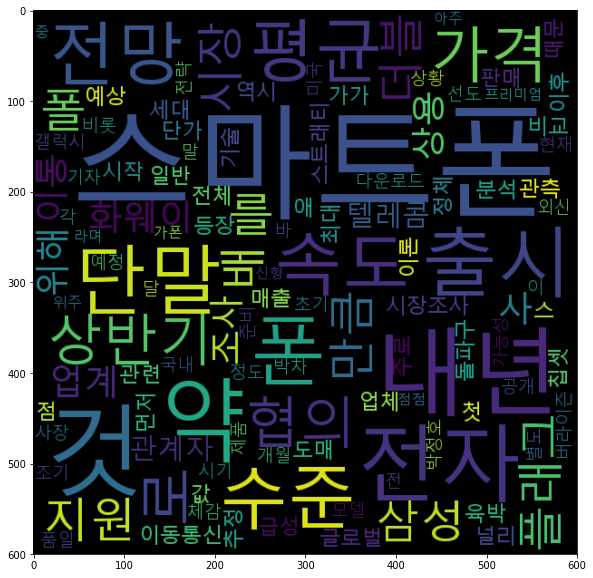

In [135]:
f = open('daum_crawling_filter_abc.txt')
keywords=f.read()
make_cloud(keywords, "c:/Windows/Fonts/malgun.ttf",600,600)